# **DETECTION DE COMMENTAIRES INDESIRABLES**

# **1. Introduction**

Le spam, ou courrier indésirable, est un problème omniprésent dans les communications numériques modernes, affectant les e-mails, les messages SMS, et même les plateformes de réseaux sociaux. Ces messages perturbent les utilisateurs, encombrent les systèmes et, parfois, servent de vecteurs pour des attaques malveillantes. L'utilisation de techniques avancées en traitement du langage naturel (NLP) permet de détecter et de filtrer ces messages avec une précision croissante.

# **2. Problématique**

Avec l'évolution des stratégies des spammeurs, comment concevoir un modèle NLP capable de distinguer efficacement les messages pertinents des spams tout en s'adaptant aux nouveaux types de contenu indésirable ?

# **3. Motivation**

La détection efficace de spam améliore non seulement l'expérience utilisateur mais renforce également la sécurité des systèmes de communication. Un tel projet permet de se familiariser avec des outils et des techniques essentiels en apprentissage automatique et NLP, tout en ayant un impact concret.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importation des bibliothèques**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# **4. Prétraitement et analyser un dataset**

Il est à avoir que nous allons utiliser un dataset qui contient les commentaires
des differents uilisateurs de Youtube et nous allons détecter les commentaires indésirables et désirables dans la variable indépendante rénomée **content**,
qui sont classifier dans la variable **CLASS** qui est considéré comme notre **variable cilble**.

In [ ]:
dataset = pd.concat([
    pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Knowledge/spam/Youtube01-Psy.csv'),
    pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Knowledge/spam/Youtube04-Eminem.csv'),
    pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Knowledge/spam/Youtube02-KatyPerry.csv'),
    pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Knowledge/spam/Youtube03-LMFAO.csv'),
    pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Knowledge/spam/Youtube05-Shakira.csv')
])

In [ ]:
dataset

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1956 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 91.7+ KB
None


In [ ]:
print(dataset.shape)

(1956, 5)


**Observations des valeurs manquantes**

In [ ]:
dataset.isnull().any()

,0
COMMENT_ID,False
AUTHOR,False
DATE,True
CONTENT,False
CLASS,False


In [ ]:
print(dataset['CLASS'].value_counts())

CLASS
1    1005
0     951
Name: count, dtype: int64


**Nous affichons la répartition de la variable Cible CLASS :**

▶ **1 Commentaire Indésirable**

▶ **0 Commentaires désirables**

CLASS
1    1005
0     951
Name: count, dtype: int64


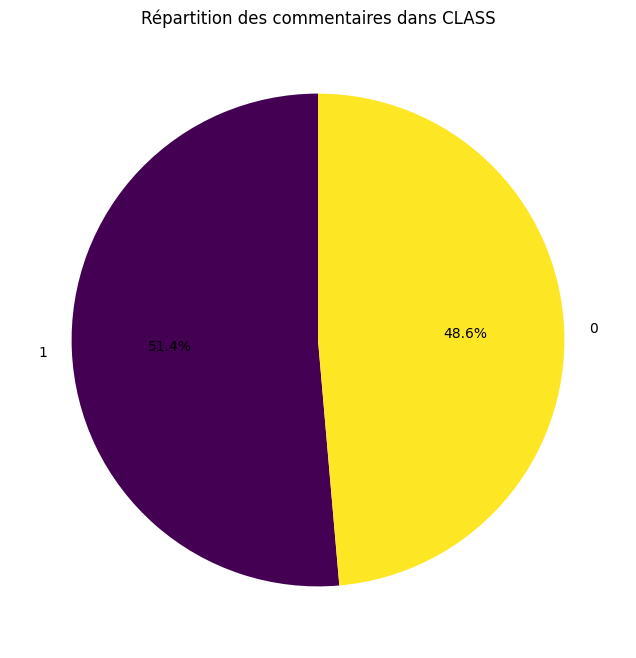

In [ ]:
import matplotlib.pyplot as plt

print(dataset['CLASS'].value_counts())

# Comptage des valeurs uniques dans la colonne CLASS
value_counts = dataset['CLASS'].value_counts()

# Création du diagramme à secteurs
plt.figure(figsize=(8, 8))
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Répartition des commentaires dans CLASS')
plt.ylabel('')  # Pour ne pas afficher le label de l'axe Y
plt.show()

**Statistiques descriptives sur la longueur des commentaires**

In [ ]:
# Longueur des messages (analyse descriptive)
dataset['message_length'] = dataset['CONTENT'].apply(len)  # Remplacez 'text' par le nom de la colonne des messages
print("\nStatistiques descriptives sur la longueur des messages :")
print(dataset['message_length'].describe())


Statistiques descriptives sur la longueur des messages :
count    1956.000000
mean       94.700920
std       128.222062
min         2.000000
25%        29.000000
50%        48.000000
75%        97.000000
max      1200.000000
Name: message_length, dtype: float64


# **5. Segmentation de texte**

▶ **Normalisation des Textes :**

▶ **Conversion des textes en minuscules pour uniformiser.**

▶ **Suppression des caractères spéciaux, nombres, et ponctuations inutiles**

▶ **Tokenisation : Lemmanization ou Stemming**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the 'punkt_tab' data

# Define stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Fonction de nettoyage
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in punctuation and not char.isdigit()])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the cleaning to the text column
dataset['CONTENT'] = dataset['CONTENT'].apply(clean_text)

# Print cleaned text example
print("\nExemple de texte nettoyé :")
print(dataset[['CONTENT']].head()) # Print only the 'CONTENT' column

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Exemple de texte nettoyé :
                                             CONTENT
0          huh anyway check youtube channel kobyoshi
1  hey guys check new channel first vid us monkey...
2                                 test say murdevcom
3                   shaking sexy ass channel enjoy ﻿
4                          watchvvtarggvgtwq check ﻿


# **6. Division du dataset**

Nous divisons notre datast en deux parties :

▶ **Trainning set 80 %**

▶ **Test set 20 %**

In [ ]:
from sklearn.model_selection import train_test_split
seed = 123
# Séparation des données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(
    dataset['CONTENT'], dataset['CLASS'],
    test_size=0.2, random_state = seed
    )

▶ **Trainning set 80 %**

In [ ]:
x_train.shape

(1564,)

In [ ]:
X_train_vec

<1564x3434 sparse matrix of type '<class 'numpy.int64'>'
	with 11962 stored elements in Compressed Sparse Row format>

▶ **Test set 20 %**

In [ ]:
x_test.shape

(392,)

# ▶------------------**Vectorisation**----------------------◀

Comme nous les savons tous les algorithmes ne tiens pas comme de
texte pendant les calculs pour

ce faire nous devons transformer les texte en numériques sur base d'un vecteur d'entré.

Il existe plusieurs techniques pour le faire en NLP :

- **Bag of Words (BoW)** :
Qui crée une matrice où chaque ligne représente un document (texte) et chaque colonne un mot unique.
Les valeurs sont les fréquences des mots.

- **TF-IDF (Term Frequency-Inverse Document Frequency)** : Qui prend en compte la fréquence d’un mot dans un document et réduit l’importance des mots fréquents dans tout le corpus.

- **WordEmbeddings Pré-entraînés**: Qui utilise des vecteurs denses comme Word2Vec ou GloVe pour représenter des relations sémantiques entre les mots.

**Dans notre cas, nous allons utiliser Bag of word comme méthode de vectorisation.**


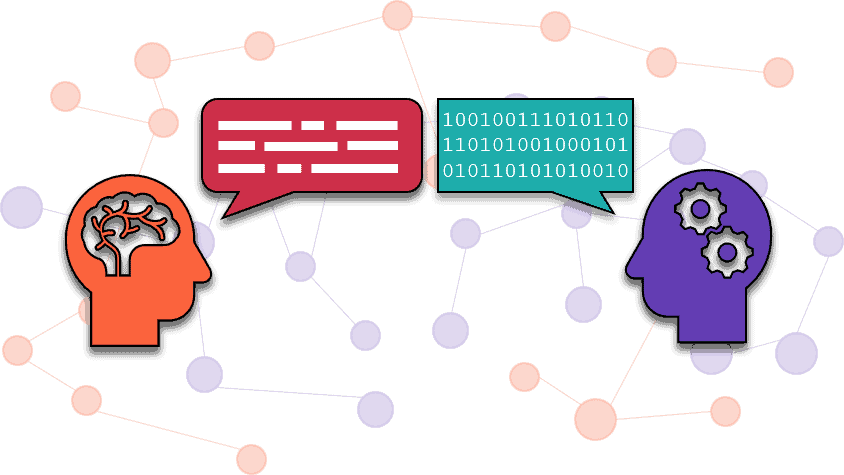

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [ ]:
vectorizer.get_feature_names_out()

array(['aaaaaaa', 'abbastfuck', 'ablaze', ...,
       'ｈｔｔｐｗｗｗｅｂａｙｃｏｍｕｓｒｓｈｏｅｃｏｌｌｅｃｔｏｒ', 'ｉｓ', 'ｔｈｉｓ'], dtype=object)

In [ ]:
print(X_train_vec)

  (0, 1829)	1
  (0, 2745)	2
  (0, 2728)	1
  (0, 2940)	1
  (0, 1862)	1
  (0, 397)	1
  (0, 562)	1
  (0, 1596)	1
  (1, 2853)	1
  (1, 416)	1
  (2, 2745)	2
  (2, 2074)	1
  (2, 1036)	1
  (2, 1756)	1
  (2, 1760)	2
  (2, 508)	1
  (2, 1260)	1
  (2, 3369)	1
  (3, 2745)	1
  (3, 232)	1
  (4, 433)	1
  (4, 2273)	1
  (4, 3391)	1
  (5, 433)	1
  (5, 3391)	1
  :	:
  (1558, 321)	1
  (1558, 3307)	1
  (1558, 3366)	1
  (1558, 1037)	1
  (1558, 3419)	1
  (1559, 1276)	1
  (1559, 941)	1
  (1559, 2661)	1
  (1559, 2442)	1
  (1559, 1024)	1
  (1559, 3363)	1
  (1559, 1668)	1
  (1559, 1241)	1
  (1559, 2444)	1
  (1560, 1760)	1
  (1560, 1597)	1
  (1561, 433)	1
  (1561, 3391)	1
  (1561, 3155)	1
  (1562, 433)	1
  (1562, 3391)	1
  (1562, 3155)	1
  (1563, 433)	1
  (1563, 3391)	1
  (1563, 3155)	1


▶ ***Içi nous faisons la Validation croiseée avec 5 Fold pour nous éviter le surapprentissage***

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Initialiser le modèle
model = MultinomialNB()

# Initialiser Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scores de validation croisée (précision ici)
scores = cross_val_score(model, X_train_vec, y_train, cv=kf, scoring='accuracy')

print(f"Scores de validation croisée : {scores}")
print(f"Précision moyenne : {scores.mean():.2f}")


Scores de validation croisée : [0.87220447 0.84664537 0.86900958 0.87220447 0.85897436]
Précision moyenne : 0.86


# **7. Choix du Modèle et Evaluation**

Nous allons construire plusieurs modèles de classification pour détecter les messages indésirables qui sera noté par **1**, ensuite choisir la bonne:

- Naïve Bayes

- Random Forest

- Arbre de décision

**1. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fitted = rf.fit(X_train_vec, y_train)
rf.fitted.score(x_test_vec, y_test)

0.9056122448979592

Nous testons sur des nouvelles commentaires:

- stay with me to have fun on XXX money

- very important topic

In [ ]:
rf.fitted.predict(vectorizer.transform(['stay with me to have fun on XXX money']))

array([1])

In [ ]:
rf.fitted.predict(vectorizer.transform(['very important topic']))

array([0])

**2. Naive Bayes**

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       202
           1       0.82      0.94      0.88       190

    accuracy                           0.87       392
   macro avg       0.88      0.87      0.87       392
weighted avg       0.88      0.87      0.87       392



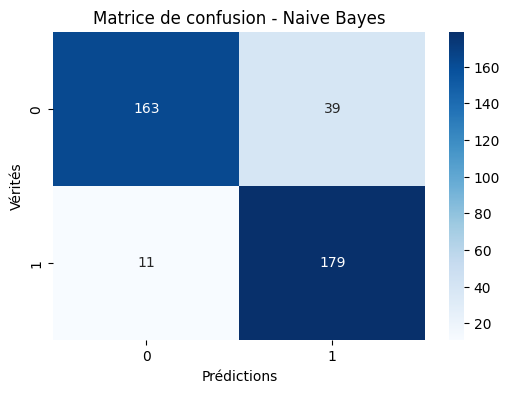

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train_vec, y_train)
y_pred_nb = model_nb.predict(x_test_vec)

# Génération de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Affichage graphique de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model_nb.classes_, yticklabels=model_nb.classes_)
plt.title("Matrice de confusion - Naive Bayes")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

**3. Arbre de décision**

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       202
           1       0.95      0.84      0.89       190

    accuracy                           0.90       392
   macro avg       0.91      0.90      0.90       392
weighted avg       0.91      0.90      0.90       392



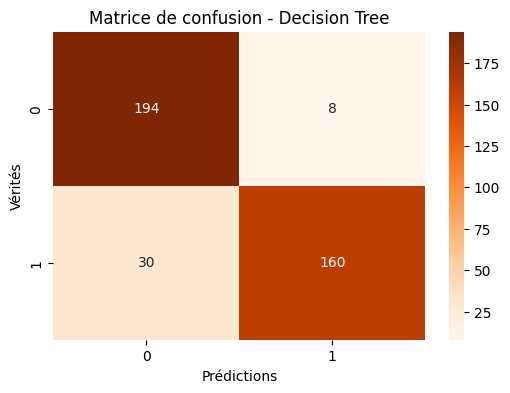

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_vec, y_train)
y_pred_dt = model_dt.predict(x_test_vec)

# Rapport de classification
print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Génération de la matrice de confusion
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Affichage graphique de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=model_dt.classes_, yticklabels=model_dt.classes_)
plt.title("Matrice de confusion - Decision Tree")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# **Test sur de nouvelle valeur**

**Nous testons sur des nouvelles commentaires:**

- **stay with me to have fun on XXX money**

- **very important topic**

In [ ]:
rf.fitted.predict(vectorizer.transform(['stay with me to have fun on XXX money']))

array([1])

In [ ]:
rf.fitted.predict(vectorizer.transform(['very important topic']))

array([0])

# **8. Concluson**

**le modèle Naive Bayes est le plus adapté, car il offre un rappel élevé de 94% pour la classe des spams, indiquant qu'il identifie presque tous les spams correctement. Bien que sa précision globale soit légèrement inférieure à celle de Random Forest et Decision Tree, sa capacité à minimiser les faux négatifs en fait un choix optimal pour une tâche axée sur la détection des spams.**